In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv('Dataset\Mall_Customers.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Siddhit\AppData\Local\Temp\ipykernel_13284\1510237942.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('Dataset\Mall_Customers.csv')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

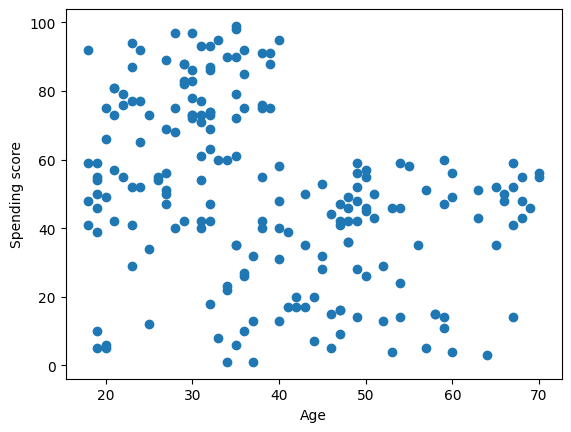

In [6]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

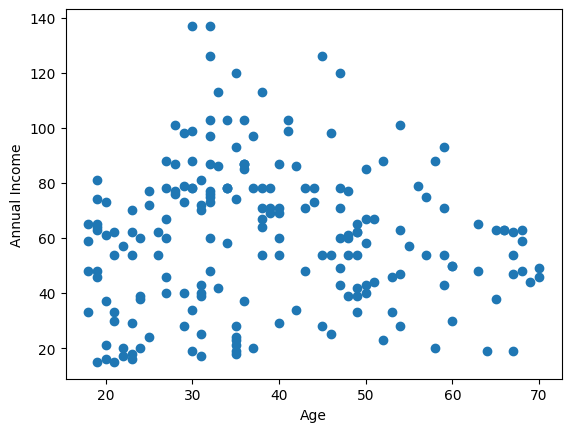

In [9]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

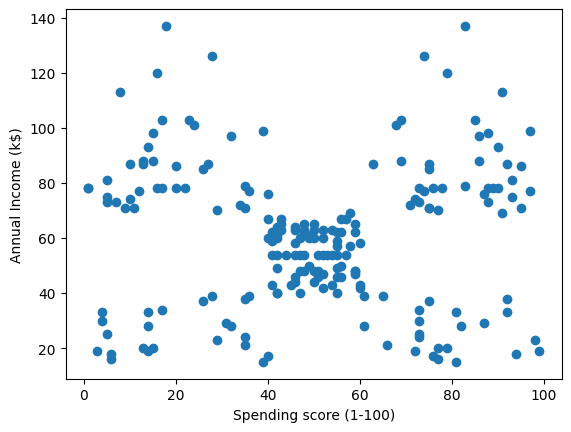

In [11]:
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel("Spending score (1-100)")
plt.ylabel("Annual Income (k$)")

In [12]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
customer_df = df[relevant_cols]
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df)

StandardScaler()

In [14]:
scaler_data = scaler.transform(customer_df)
scaler_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [31]:
from sklearn.cluster import KMeans  # Correct import

def find_best_cluster(df, maximum_k):
    cluster_centers = []
    k_values = []
    for k in range(2, maximum_k):  # Iterate over possible k values
        kmeans_model = KMeans(n_clusters=k, random_state=42)  # Fixed typo
        kmeans_model.fit(df)
        
        cluster_centers.append(kmeans_model.inertia_)  # Correct spelling: inertia_
        k_values.append(k)
    return cluster_centers, k_values


In [32]:
clusters_centers, k_values = find_best_cluster(scaler_data, 12)

In [36]:
import matplotlib.pyplot as plt

def generate_elbow_plot(cluster_centers, k_values):

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, cluster_centers, marker='o', linestyle='--', color='b')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)  # Ensure all k values are shown
    plt.grid(True)
    plt.show()


In [37]:
kmeans_model = genrate_elbow_plot(clusters_centers, k_values)

TypeError: _AxesBase.__init__() missing 1 required positional argument: 'fig'